# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),r'C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3\
C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3\asalto 1
C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3\incendio 12013
C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3\inundacion 10828
C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3\robo 9874
C:\Users\r2rit\IA PROYECTOS\CNN\Imagenes3\tornado 8861
Directorios leidos: 5
Imagenes en cada directorio [12014, 10828, 9874, 8861, 15861]
suma Total de imagenes en subdirs: 57438


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  57438


In [5]:
risk=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    risk.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (45950, 28, 28, 3) (45950,)
Testing data shape :  (11488, 28, 28, 3) (11488,)


Text(0.5, 1.0, 'Ground Truth : 4')

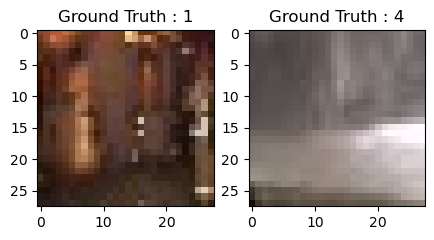

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

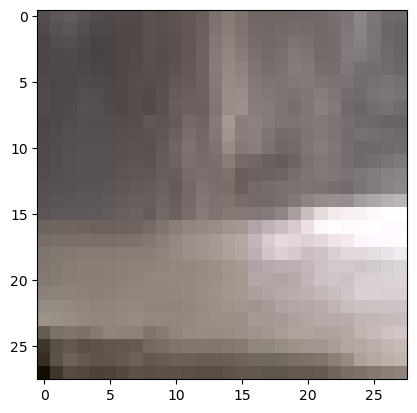

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(36760, 28, 28, 3) (9190, 28, 28, 3) (36760, 5) (9190, 5)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-5 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
risk_model = Sequential()
risk_model.add(Input(shape=(28, 28, 3)))  # Medida de las imagenes procesar 28x28
risk_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
risk_model.add(LeakyReLU(negative_slope=0.1))
risk_model.add(MaxPooling2D((2, 2), padding='same'))
risk_model.add(Dropout(0.5))

risk_model.add(Flatten())
risk_model.add(Dense(32, activation='linear'))
risk_model.add(LeakyReLU(negative_slope=0.1))
risk_model.add(Dropout(0.5))
risk_model.add(Dense(nClasses, activation='softmax'))

In [15]:
risk_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
INIT_LR = 0.01  # Tasa de aprendizaje inicial
decay_steps = 100  # Número de pasos de decaimiento (puedes ajustarlo según sea necesario)
decay_rate = 0.96  # Factor de decaimiento (puedes ajustarlo según sea necesario)

# Definir el programador de tasa de aprendizaje
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

# Compilar el modelo con el optimizador actualizado
risk_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
    metrics=['accuracy']
)


# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
risk_train = risk_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5016 - loss: 1.2283 - val_accuracy: 0.8712 - val_loss: 0.4569
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8125 - loss: 0.5465 - val_accuracy: 0.9318 - val_loss: 0.2776
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8712 - loss: 0.4044 - val_accuracy: 0.9471 - val_loss: 0.2134
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8971 - loss: 0.3332 - val_accuracy: 0.9461 - val_loss: 0.1958
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9117 - loss: 0.2939 - val_accuracy: 0.9629 - val_loss: 0.1590
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9170 - loss: 0.2721 - val_accuracy: 0.9651 - val_loss: 0.1499
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9277 - loss: 0.2480 - val_accuracy: 0.9669 - val_loss: 0.1389
Epoch 8/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9261 - loss: 0.2438 - val_accuracy: 0.

In [19]:
# guardar el modelo en el nuevo formato
risk_model.save("C:\\Users\\r2rit\\IA PROYECTOS\\CNN4\\CNN\\risk_model.h5")

# Evaluamos la red

In [20]:
test_eval = risk_model.evaluate(test_X, test_Y_one_hot, verbose=1)

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1178


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11825542151927948
Test accuracy: 0.9735376238822937


In [22]:
risk_train.history

{'accuracy': [0.6399891376495361,
  0.8313112258911133,
  0.8799782395362854,
  0.9014418125152588,
  0.9136017560958862,
  0.9227421283721924,
  0.9269586801528931,
  0.9292981624603271,
  0.9312840104103088,
  0.9352829456329346,
  0.9365614652633667,
  0.935962975025177,
  0.9365614652633667,
  0.9388465881347656,
  0.939037024974823,
  0.9406691789627075,
  0.9391186237335205,
  0.9403155446052551,
  0.9414036870002747,
  0.9408868551254272,
  0.9415669441223145,
  0.9403155446052551,
  0.9416213035583496,
  0.9417301416397095,
  0.9404788017272949,
  0.9406691789627075,
  0.9401523470878601,
  0.9408868551254272,
  0.9409412145614624,
  0.9398258924484253,
  0.9427366852760315,
  0.9408324360847473,
  0.9408596158027649,
  0.9412949085235596,
  0.9420293569564819,
  0.9410500526428223,
  0.9414581060409546,
  0.9418933391571045,
  0.9418661594390869,
  0.9395266771316528,
  0.9422197937965393,
  0.9410772323608398,
  0.9405331611633301,
  0.9424102306365967,
  0.9406148195266724,


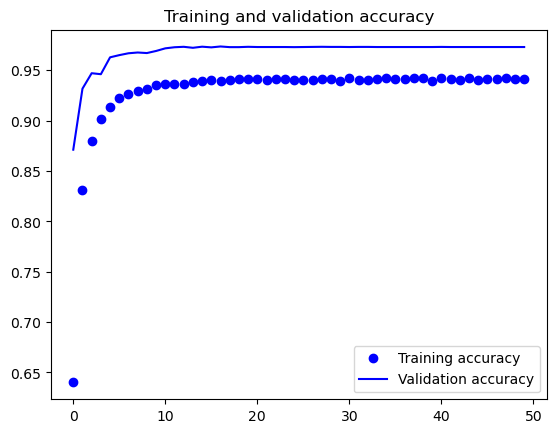

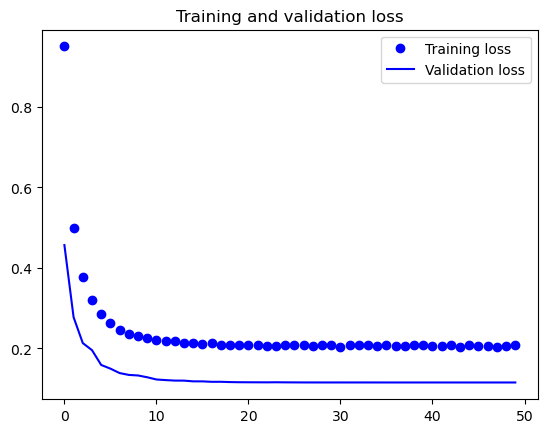

In [23]:
accuracy = risk_train.history['accuracy']
val_accuracy = risk_train.history['val_accuracy']
loss = risk_train.history['loss']
val_loss = risk_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = risk_model.predict(test_X)

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
predicted_classes=[]
for predicted_risk in predicted_classes2:
    predicted_classes.append(predicted_risk.tolist().index(max(predicted_risk)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((11488,), (11488,))

# Aprendamos de los errores: Qué mejorar

Found 11184 correct labels


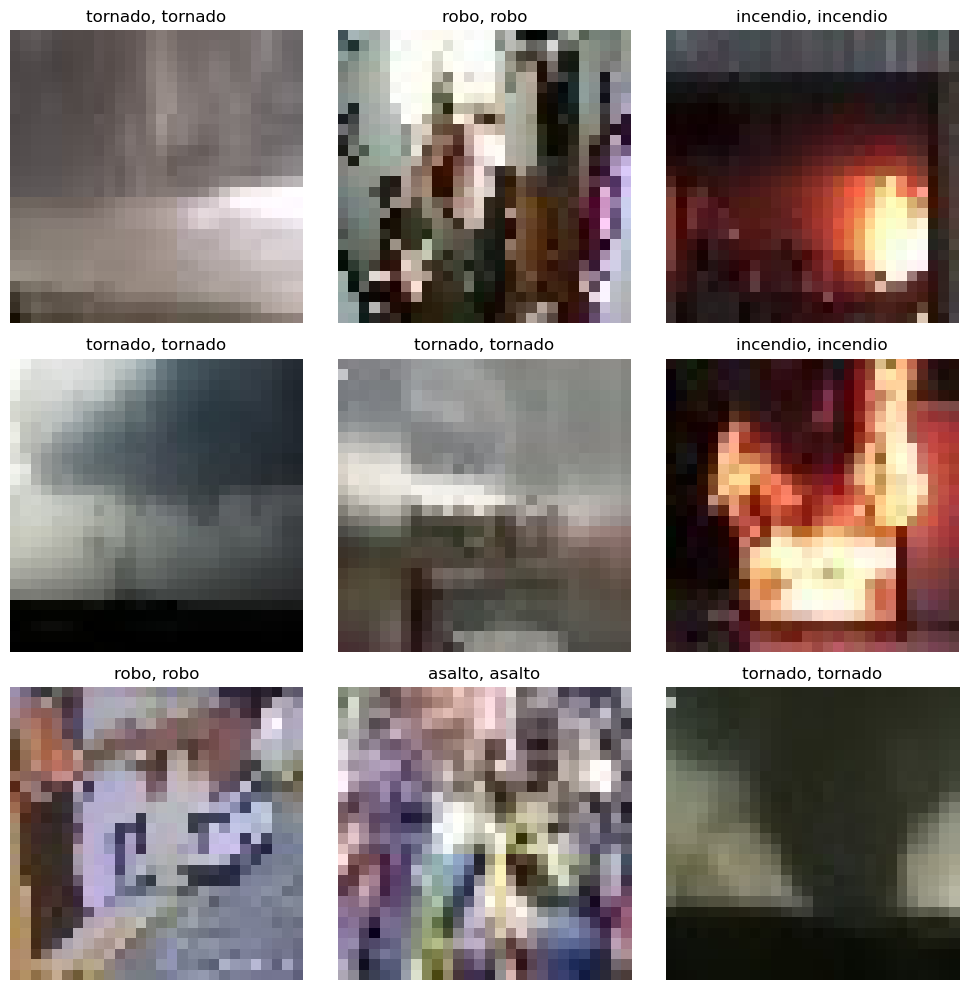

In [27]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))

# Crear una figura
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, correct in enumerate(correct[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[correct].reshape(28, 28, 3), cmap='gray', interpolation='none')
    ax.set_title("{}, {}".format(risk[predicted_classes[correct]], risk[test_Y[correct]]))
    ax.axis('off')  # Opcional: oculta los ejes

plt.tight_layout()
plt.show()

Found 304 incorrect labels


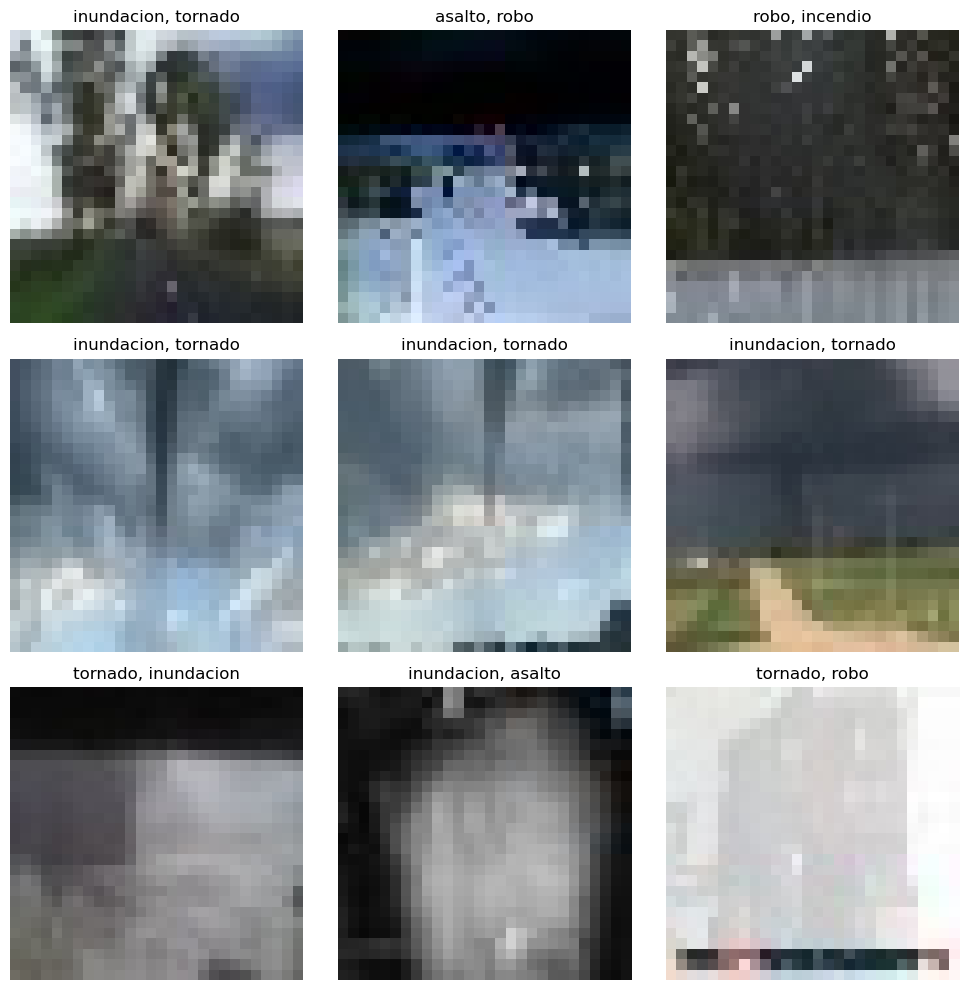

In [28]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

# Crear una figura
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, incorrect in enumerate(incorrect[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[incorrect].reshape(28, 28, 3), cmap='gray', interpolation='none')
    ax.set_title("{}, {}".format(risk[predicted_classes[incorrect]], risk[test_Y[incorrect]]))
    ax.axis('off')  # Opcional: oculta los ejes

plt.tight_layout()
plt.show()

In [29]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99      2399
     Class 1       0.99      0.99      0.99      2154
     Class 2       0.93      0.95      0.94      2005
     Class 3       0.99      0.97      0.98      1794
     Class 4       0.97      0.97      0.97      3136

    accuracy                           0.97     11488
   macro avg       0.97      0.97      0.97     11488
weighted avg       0.97      0.97      0.97     11488



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


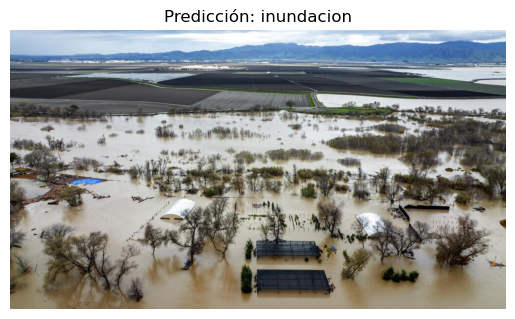

C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Inundacion100.jpg inundacion


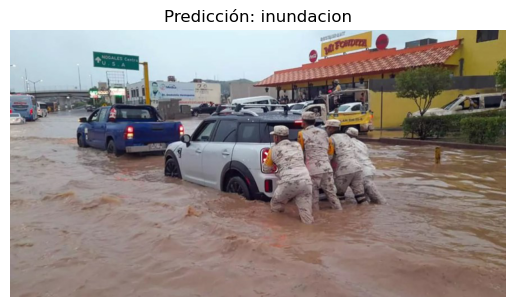

C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Inundacion200.jpg inundacion


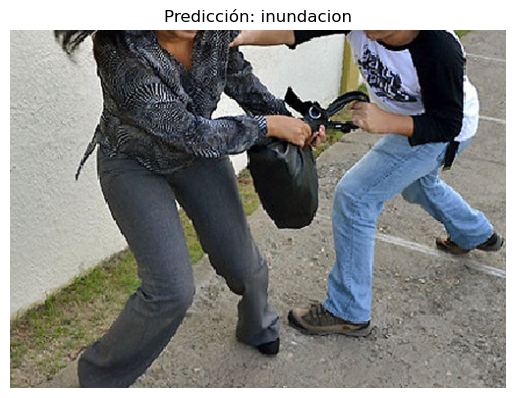

C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Asalto1.jpeg inundacion


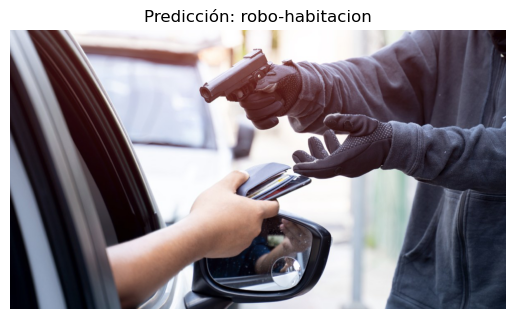

C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Asalto300.jpg robo-habitacion


In [30]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np

# Definimos una lista para las imágenes y los nombres de archivo
images = []
filenames = ['C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Inundacion100.jpg',
            'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Inundacion200.jpg',
            'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Asalto1.jpeg',
             'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Asalto300.jpg',
             #'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Inundacion3.jpeg',
             #'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Robo1.jpeg',
            # 'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Tornado1.jpeg',
             # 'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Incendio.jpeg',
            #'C://Users//r2rit//IA PROYECTOS//CNN//imagenesPrueba//Catastrofes//Incendio2.jpg'


            ]

# Iteramos sobre los nombres de archivo para cargar y redimensionar las imágenes
for filepath in filenames:
    image = plt.imread(filepath)  # No especificar 0 para leer en color
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

# Convertimos la lista de imágenes a un array numpy
X = np.array(images, dtype=np.uint8)
test_X = X.astype('float32')
test_X = test_X / 255.0

# Realizamos la predicción usando el modelo
predicted_classes = risk_model.predict(test_X)

# Definimos una lista con las posibles clases (esto depende de tu modelo)
risk = ['asalto', 'incendio', 'inundacion', 'robo-habitacion', 'tornado']  # Ejemplo de clases

# Iteramos sobre las predicciones y mostramos la imagen con la predicción correspondiente
for i, img_tagged in enumerate(predicted_classes):
    # Mostramos la imagen original
    original_image = plt.imread(filenames[i])  # Cargamos la imagen original para mostrarla
    plt.imshow(original_image)
    plt.title(f"Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.axis('off')  # Opcional: para ocultar los ejes
    plt.show()
    
    # Imprimimos el nombre del archivo y la predicción
    print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])
